In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [2]:
df = pd.read_csv('C:\\Users\\Darshan\\Desktop\\Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.drop(['RowNumber'],axis =1, inplace = True)

In [7]:
df.shape

(10000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df['Balance'].max()

250898.09

In [10]:
df.loc[df['Balance']== max(df['Balance'])]['Surname']

2092    Lo
Name: Surname, dtype: object

In [11]:
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [12]:
df.drop(['Gender'], axis = 1, inplace  = True)

In [13]:
df = pd.concat([df,gender], axis = 1)

In [14]:
df

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,1
9996,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9997,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,0
9998,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1


In [15]:
df['Geography'] = df['Geography'].map({'France': 'F','Spain':'S','Germany':'G'})

In [18]:
df

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15634602,Hargrave,619,F,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,Hill,608,S,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,Onio,502,F,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,Boni,699,F,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,Mitchell,850,S,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,F,39,5,0.00,2,1,0,96270.64,0,1
9996,15569892,Johnstone,516,F,35,10,57369.61,1,1,1,101699.77,0,1
9997,15584532,Liu,709,F,36,7,0.00,1,0,1,42085.58,1,0
9998,15682355,Sabbatini,772,G,42,3,75075.31,2,1,0,92888.52,1,1


<AxesSubplot:xlabel='Male', ylabel='Tenure'>

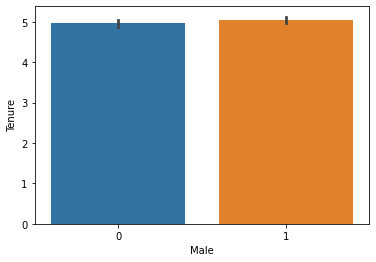

In [21]:
sns.barplot('Male','Tenure', data = df)

In [18]:
df['Male'].value_counts()

1    5457
0    4543
Name: Male, dtype: int64

<AxesSubplot:xlabel='Male', ylabel='count'>

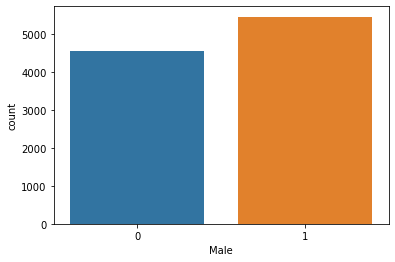

In [19]:
sns.countplot(x= 'Male', data = df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

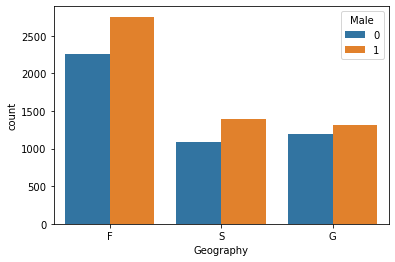

In [20]:
sns.countplot(x= 'Geography', hue = 'Male', data = df)

<AxesSubplot:xlabel='Male', ylabel='count'>

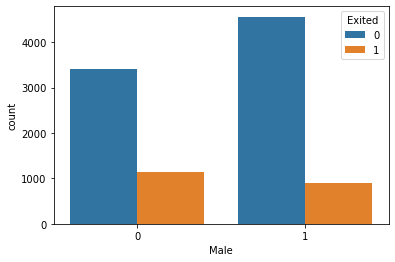

In [22]:
sns.countplot(x= 'Male', hue = 'Exited', data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

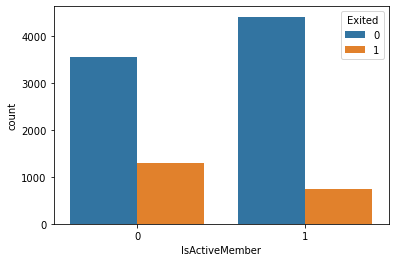

In [25]:
sns.countplot(x= 'IsActiveMember', hue = 'Exited', data = df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

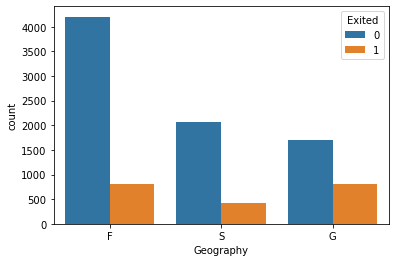

In [26]:
sns.countplot(x= 'Geography', hue = 'Exited', data = df)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

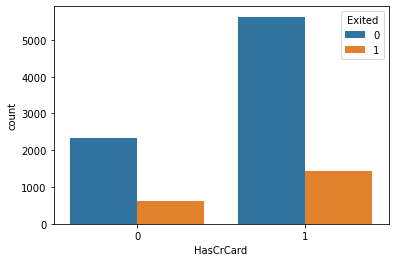

In [28]:
sns.countplot(x= 'HasCrCard', hue = 'Exited', data = df)

<AxesSubplot:xlabel='Balance'>

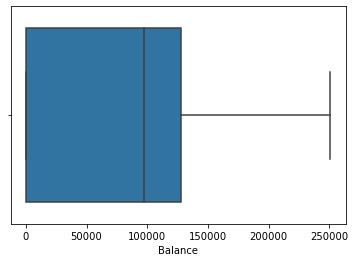

In [27]:
sns.boxplot(x= 'Balance', data = df)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

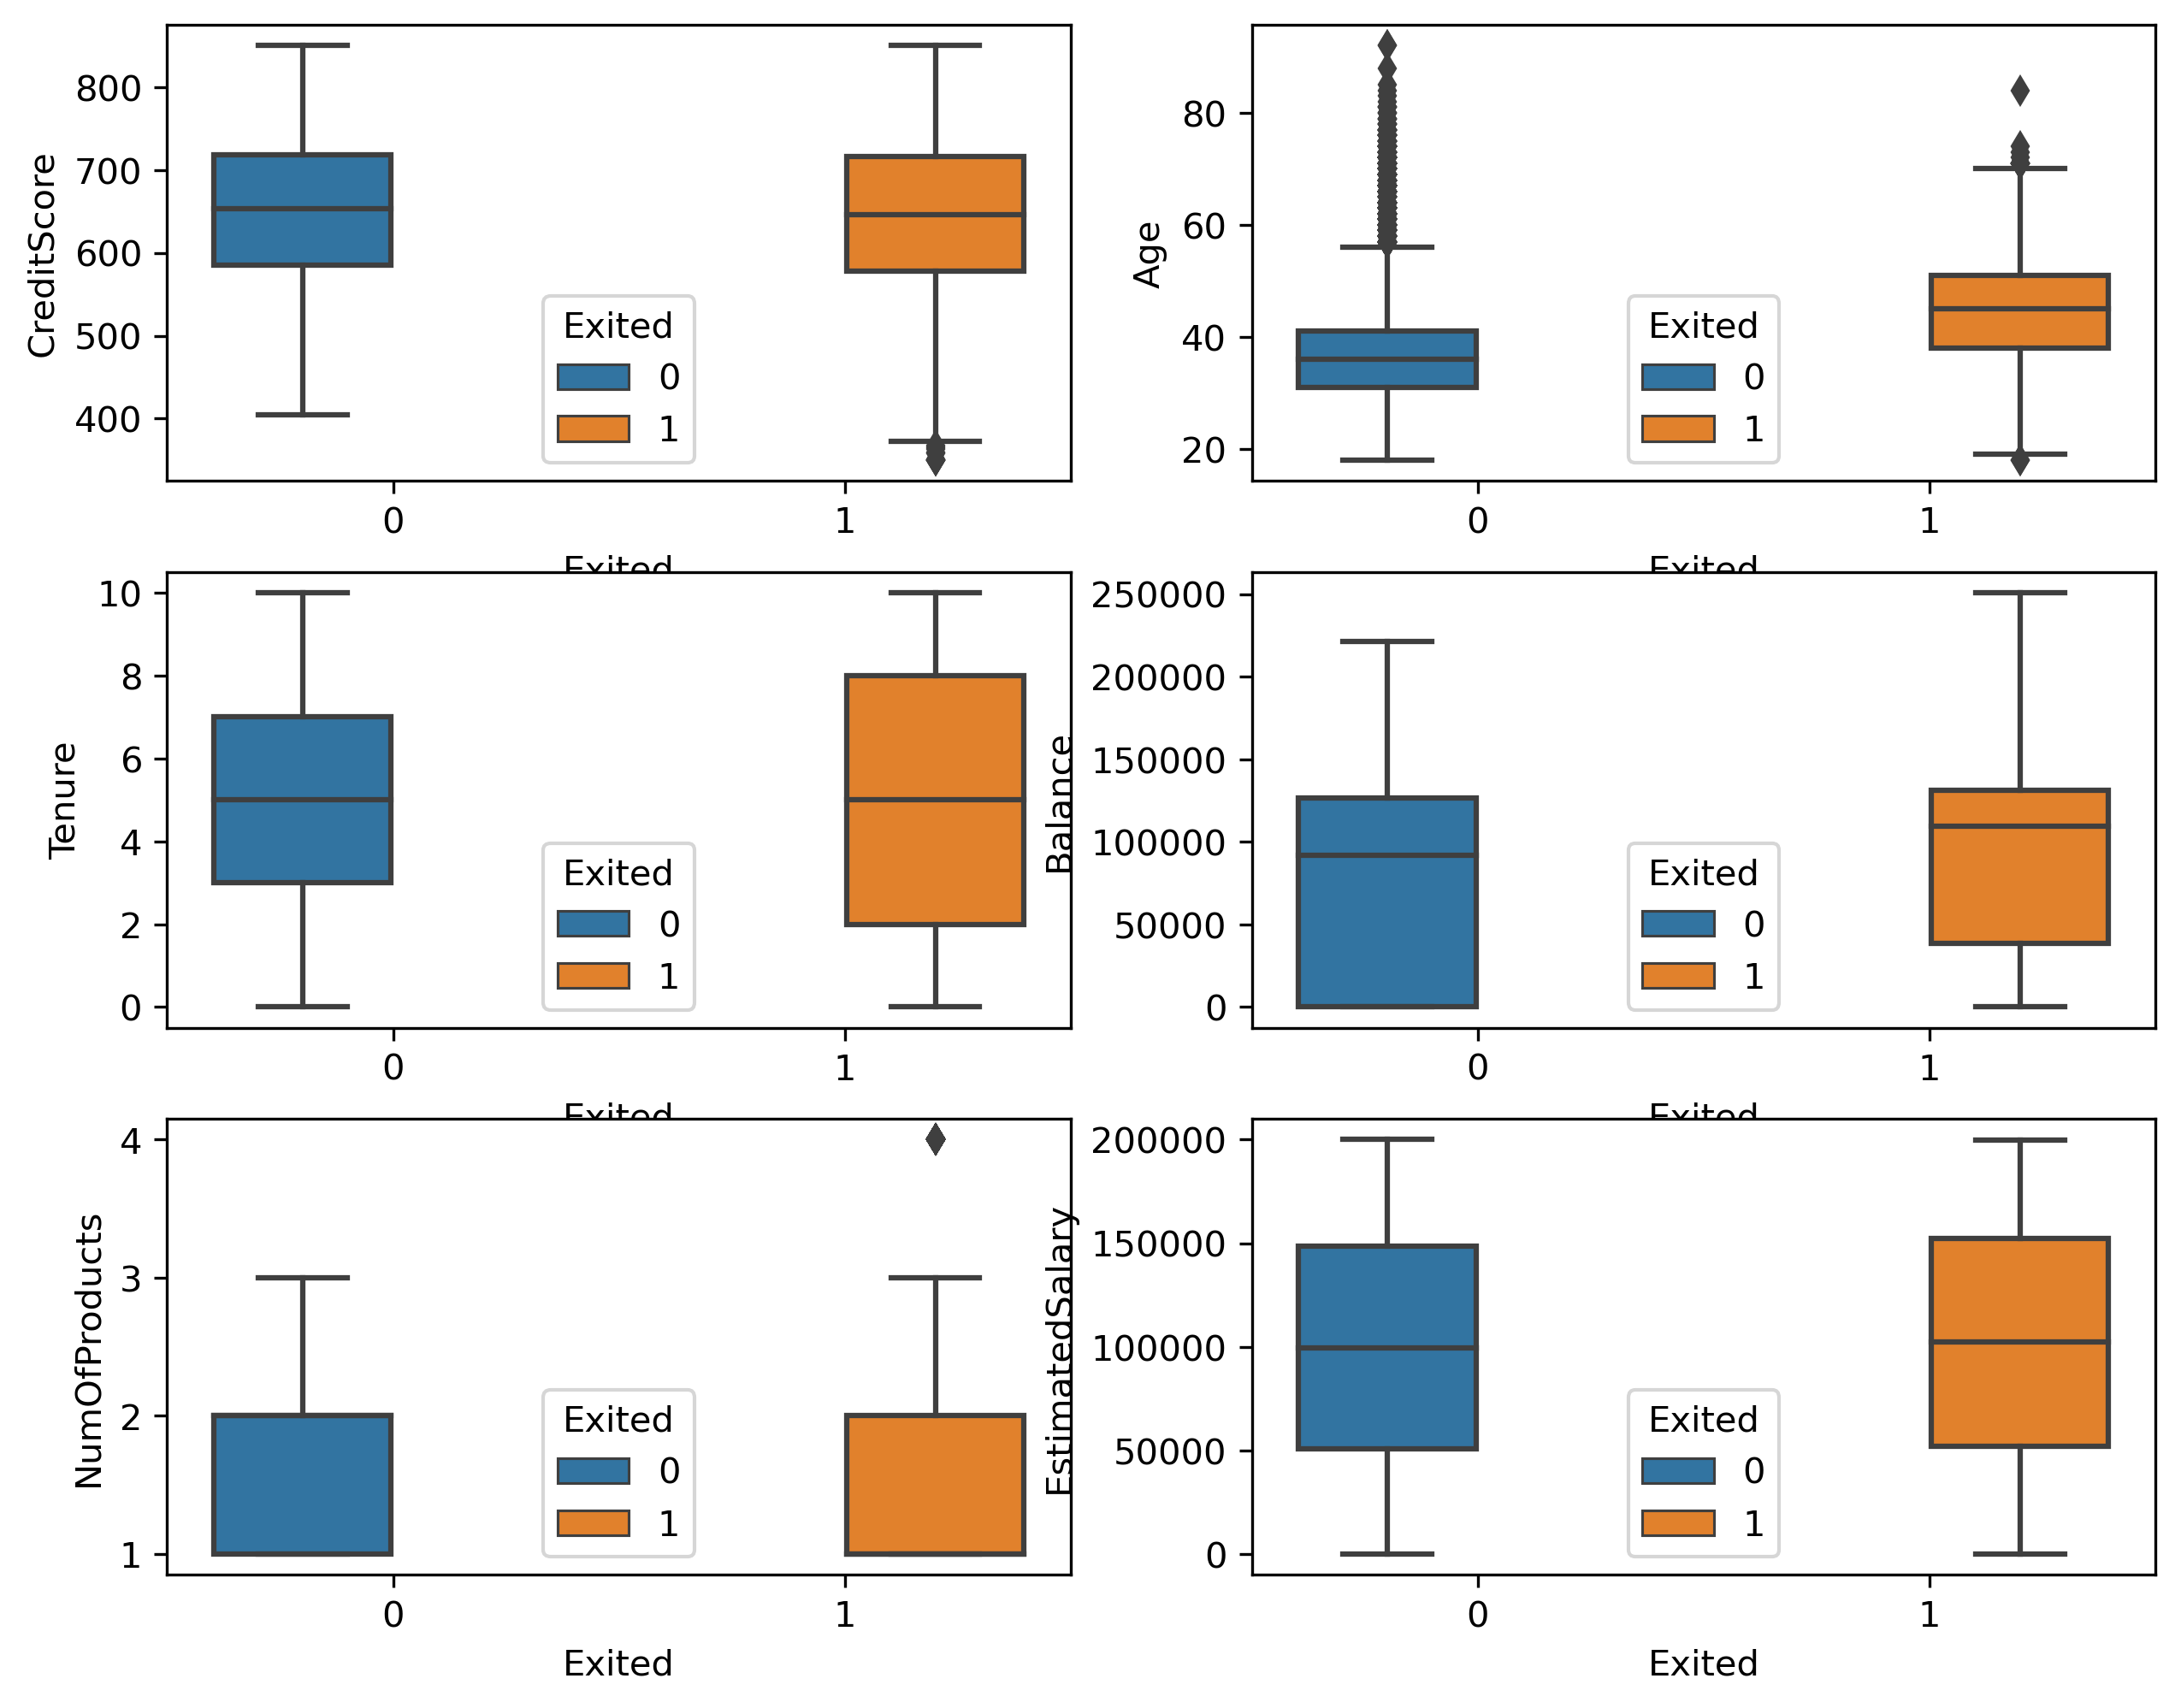

In [29]:
fig, arr = plt.subplots(3,2, figsize = (10,8), dpi = 300)
sns.boxplot(x= 'Exited', y= 'CreditScore', hue = 'Exited', data = df, ax = arr[0][0])
sns.boxplot(x= 'Exited', y= 'Age', hue = 'Exited', data = df, ax = arr[0][1])
sns.boxplot(x= 'Exited', y= 'Tenure', hue = 'Exited', data = df, ax = arr[1][0])
sns.boxplot(x= 'Exited', y= 'Balance', hue = 'Exited', data = df, ax = arr[1][1])
sns.boxplot(x= 'Exited', y= 'NumOfProducts', hue = 'Exited', data = df, ax = arr[2][0])
sns.boxplot(x= 'Exited', y= 'EstimatedSalary', hue = 'Exited', data = df, ax = arr[2][1])